In [419]:
cd C:\Users\ic07949\desktop\personal\hong\HW5

C:\Users\ic07949\desktop\personal\hong\HW5


In [454]:
import numpy as np
import pandas as pd

import matplotlib.image as mpimg
import matplotlib.pyplot as plt 

from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [421]:
label_df = pd.read_csv('label.csv')
label_df.head()

,name of the file,digit
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4


In [422]:
label_df.shape

(1797, 2)

In [423]:
cd C:\Users\ic07949\desktop\personal\hong\HW5\Digit

C:\Users\ic07949\desktop\personal\hong\HW5\Digit


a- Download	the	dataset	“Digit”	from	CSNS.	Check	out	the	dataset.	It	includes	1797	small	
images	(8x8	pixels),	each	one	includes	a	hand-written	digit	(0-9).	You	have	to	download	
the	corresponding	csv	 file	 that	includes	 the	labels	of	 the	images.	The	goal	is	 to	build	a	
Machine	Learning	Algorithm that	can	recognize	the	hand-written	digits.	
Import	the	following	two	libraries	to	work	with	images:
import	matplotlib.image	as	mpimg
import	matplotlib.pyplot	as	plt
you	can	use:	
mpimg.imread(file_name)			to	load	an	image,	and	
plt.imshow(image_name,	 cmap=plt.cm.gray_r,	 interpolation='nearest')	 to	 show	 an	
image.	Add			%matplotlib	inline			at	top	of	your	code	to	make	sure	that	the	images	will	be	shown	inside	the	Jupyter	explorer	page.

In [424]:
a = mpimg.imread('0.jpg')

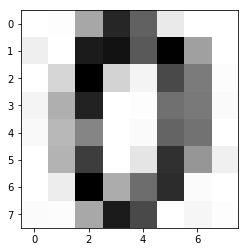

In [425]:
%matplotlib inline
plt.imshow(a , cmap=plt.cm.gray_r, interpolation='nearest')

b- Build	the	feature	matrix	and	label	vector: Each	image	is	considered	as	a	data	sample	with	
pixels	as	features.	Thus,	to	build	the	feature	table	you	have	to	convert	each	8x8	image	
into	a	row	of	the	feature	matrix	with	64	feature	columns	for	64	pixels.	

In [568]:
mypath = "C:\Users\ic07949\desktop\personal\hong\HW5\Digit"
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]

In [570]:
onlyfiles.sort(key=lambda f: int(filter(str.isdigit, f)))

In [572]:
images = numpy.empty(len(onlyfiles), dtype=object)

In [573]:
for i in range(0, len(onlyfiles)):
    images[i] = mpimg.imread( join(mypath,onlyfiles[i]) )
    images[i] = images[i].ravel()

In [579]:
images = pd.DataFrame(images, columns = ['name'])

In [580]:
images_df = pd.DataFrame()

In [581]:
for i in range(1797):
    k =  pd.DataFrame(images["name"][1796-i]).T
    images_df = k.append(images_df)

In [582]:
images_df = images_df.reset_index()

In [583]:
master_df = pd.concat([label_df, images_df], axis =1)

In [586]:
master_df.head(6)

,name of the file,digit,index,0,1,2,3,4,5,6,...,54,55,56,57,58,59,60,61,62,63
0,0,0,0,0,2,88,217,158,21,0,...,4,0,4,3,87,228,182,0,9,2
1,1,1,0,0,0,11,187,210,78,5,...,0,0,0,0,0,172,251,157,0,12
2,2,2,0,0,0,5,59,240,199,2,...,92,0,0,11,0,54,173,255,138,0
3,3,3,0,6,0,108,255,213,13,10,...,168,1,0,0,118,217,226,159,0,3
4,4,4,0,0,6,0,34,160,7,7,...,7,0,0,0,2,42,250,51,0,4
5,5,5,0,15,0,200,149,2,0,13,...,69,0,7,0,143,255,255,150,7,0


c- Use	sklearn	functions	to	split	the	dataset	into	testing	and	training	sets	with	the	following 
parameters:	test_size=0.1,	random_state=2.	

In [588]:
X = master_df.iloc[:,4:67]
Y = master_df["digit"]

In [589]:
print X.shape
print Y.shape

(1797, 63)
(1797,)


In [590]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

d- Use	scikit-learn	“Random	Forest”	classifier	to	recognize	the	hand-written	digits based	on	
the	training/testing	datasets	that	you	built	in	part	(c).	Use this	command	to	import	and	
define	your	classifier:	
from			sklearn.ensemble				import				RandomForestClassifier
my_RandomForest	=	
RandomForestClassifier(n_estimators	=	19,	bootstrap	=	True,	random_state=2)
Use	 my_RandomForest.fit for	 training	 your	 random	 forest	 classifier	 and	
my_RandomForest.predict	 	 for	 prediction. Test	 your	 Machine	 Learning	 Algorithm on	
testing	set	(from	part(c)),	and	calculate	and	report	the	accuracy.	

In [591]:
my_RandomForest = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=2)

In [592]:
my_RandomForest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=19, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)

In [593]:
# Making a prediction with on the testing dataset with Random Forest Classifier
Y_predict = my_RandomForest.predict(X_test)

print(Y_predict)

[4 0 9 1 8 7 1 5 1 6 6 7 6 1 5 5 7 6 2 7 4 6 4 1 5 2 9 5 4 6 5 6 3 4 0 9 9
 8 4 6 8 1 5 7 5 6 9 6 1 7 0 1 9 7 3 3 1 1 8 8 9 8 5 7 4 7 3 5 8 4 3 1 3 8
 7 3 3 0 8 7 2 8 5 3 8 7 6 4 6 2 2 0 1 1 5 3 5 7 6 8 2 2 6 4 6 7 3 7 3 9 4
 7 0 3 5 1 5 0 3 9 2 7 3 2 0 8 1 9 2 1 5 1 0 3 4 3 0 7 3 2 2 7 3 1 6 7 2 8
 3 1 1 6 4 8 2 1 8 4 1 3 1 1 9 5 4 8 7 4 8 9 5 7 6 9 8 0 4 0 0 9]


In [594]:
print Y_test.head()

154     4
564     0
1444    9
1394    1
1660    4
Name: digit, dtype: int64


In [595]:
# Calculating the Score of Random Forest Classifier
score = accuracy_score(Y_test, Y_predict)
print('Random Forest Classifier Accuracy: ' + str(score))

Random Forest Classifier Accuracy: 0.938888888889


e- Find	exactly	which	one	of	the	data	samples	(i.e.	which	images)	have	been	misclassified (classified	incorrectly)	in	your	testing	set.	Then,	use	the	following	command	to	show	the	 misclassified	images:
plt.imshow(image_name,	cmap=plt.cm.gray_r,	interpolation='nearest')	

my prediction is 8, but actual is 4


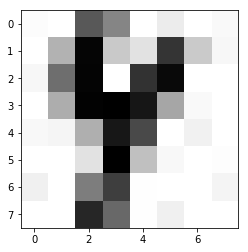

In [597]:
mistake = mpimg.imread('1660.jpg')
plt.imshow(mistake, cmap=plt.cm.gray_r, interpolation='nearest')

print "my prediction is 8, but actual is 4"